<a href="https://colab.research.google.com/github/sanu4satyam/Telecom_Churn_Prediction/blob/main/Telecom_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Name**    -  **Telecom Churn Prediction**



**PROBLEM OVERVIEW**


Customer churn prediction is extremely important for any business as it recognizes the clients who are likely to stop using their services.

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

*Churn prediction is analytical studies on the possibility of a customer abandoning a product or service. The goal is to understand and take steps to change it before the costumer gives up the product or service.*

**OBJECTIVE:** *To perform data analysis and make a predictive model to find the churn and reasons behind it. Suggesting some measures.*

***

**Importing Basic Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

**Dataset Loading**

In [ ]:
churn = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

**Dataset View**

In [ ]:
churn.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3454,6773-LQTVT,Female,1,Yes,Yes,29,No,No phone service,DSL,No,...,Yes,No,No,No,Month-to-month,Yes,Mailed check,35.65,1025.15,No
822,7975-TZMLR,Male,0,No,No,47,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,103.10,4889.3,No
2258,9150-HEPMB,Male,0,No,No,56,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,52.70,3019.7,No
147,2135-RXIHG,Male,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,45.65,45.65,Yes
6068,3945-GFWQL,Female,0,No,Yes,12,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,44.55,480.6,Yes
5082,8779-YIQQA,Male,0,Yes,Yes,21,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.80,350.1,No
2569,8237-ULIXL,Female,0,Yes,No,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.85,1871.85,No
577,8270-RKSAP,Male,0,No,No,9,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.50,597.9,No
1876,3946-JEWRQ,Male,0,Yes,No,47,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,One year,Yes,Credit card (automatic),95.20,4563,No
3883,8104-OSKWT,Female,0,No,No,12,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,79.80,1001.2,No


**Dataset Rows & Columns count**

In [ ]:
churn.shape

(7043, 21)

**Dataset Information**

In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Duplicate Values**

In [ ]:
churn[churn.duplicated()].sum()

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

**Missing Values/Null Values**

In [ ]:
churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The Churn dataset has **7043 rows and 21 columns**. There are no mising values and duplicate values in the dataset. 

***

### ***EDA & Visualization***

In [ ]:
# Dataset Columns
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# Dataset Describe
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**Unique Values for each variable.**

In [ ]:
for i in churn.columns.tolist():
  print("Unique values in ",i,"is",churn[i].nunique())

Unique values in  customerID is 7043
Unique values in  gender is 2
Unique values in  SeniorCitizen is 2
Unique values in  Partner is 2
Unique values in  Dependents is 2
Unique values in  tenure is 73
Unique values in  PhoneService is 2
Unique values in  MultipleLines is 3
Unique values in  InternetService is 3
Unique values in  OnlineSecurity is 3
Unique values in  OnlineBackup is 3
Unique values in  DeviceProtection is 3
Unique values in  TechSupport is 3
Unique values in  StreamingTV is 3
Unique values in  StreamingMovies is 3
Unique values in  Contract is 3
Unique values in  PaperlessBilling is 2
Unique values in  PaymentMethod is 4
Unique values in  MonthlyCharges is 1585
Unique values in  TotalCharges is 6531
Unique values in  Churn is 2


**Churn Data Group-by Payment-Methods**

In [ ]:
df_churn= churn[(churn['Churn']== 'Yes')]
df_no_churn = churn[(churn['Churn']== 'No')]

print("Number of Customers who have Not-Churned by Payment Methods")
print(df_no_churn.groupby('PaymentMethod')['Churn'].count())
print()
print("Number of Customers who have Churned by Payment Methods")
print()
print(df_churn.groupby('PaymentMethod')['Churn'].count())

Number of Customers who have Not-Churned by Payment Methods
PaymentMethod
Bank transfer (automatic)    1286
Credit card (automatic)      1290
Electronic check             1294
Mailed check                 1304
Name: Churn, dtype: int64

Number of Customers who have Churned by Payment Methods

PaymentMethod
Bank transfer (automatic)     258
Credit card (automatic)       232
Electronic check             1071
Mailed check                  308
Name: Churn, dtype: int64


*Most of the Churned customers have payment method as Electronic Check.*

**Replacing the whitespaces with NaNs and filling the mean**

In [ ]:
churn['TotalCharges'] = churn['TotalCharges'].replace(" ", np.NaN)
churn['TotalCharges'] = churn['TotalCharges'].astype('float64')
churn.fillna(churn.TotalCharges.mean(), inplace=True)

***

**Distribution of Churn**

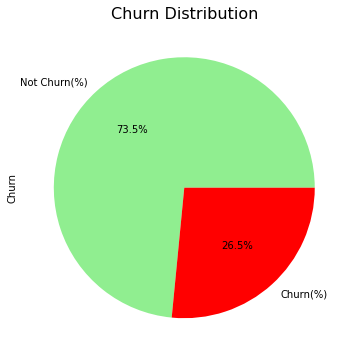

In [ ]:
churn['Churn'].value_counts().plot(kind='pie',figsize=(8,6), autopct="%1.1f%%", labels=['Not Churn(%)','Churn(%)'], colors=['lightgreen','red'],)
plt.title('Churn Distribution', fontsize= 16)
plt.show()

There are **5174** customers which are not churned which is **73.5%** of the whole customers. In other hand, **1869** customers are churned which is **26.5**.%% of the whole customers.
Almost out of **4 customers 1** customer has left.

**Gender Distribution**

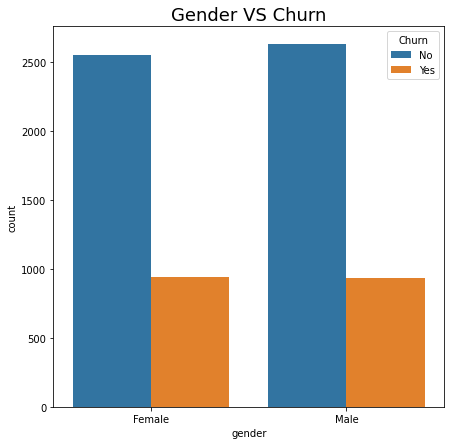

In [ ]:
plt.figure(figsize=(7,7))
sns.countplot(data=churn, x='gender', hue='Churn')
plt.title("Gender VS Churn", fontsize=18)
plt.show()

We have found that there is almost equal gender distribution.And the Churn rate is also same. There's not any distinguishable churn rate from Gender view. 

**Churn by Paperless Billing**

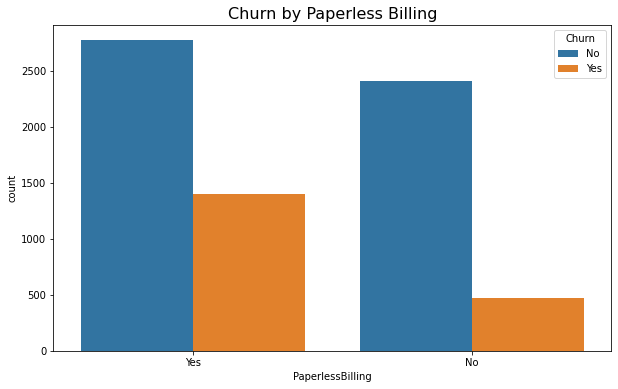

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=churn, x='PaperlessBilling', hue='Churn')
plt.title('Churn by Paperless Billing', fontsize=16)
plt.show()

*Compratively customers having paperless billing is more prone to churn.*

**Churn by Monthly Charges**

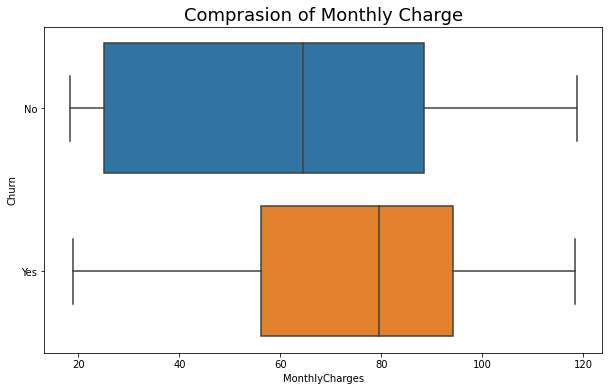

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=churn, x='MonthlyCharges', y='Churn')
plt.title("Comprasion of Monthly Charge", fontsize=18)
plt.show()

The monthly charges for the customers have churened is higher than the customers that have not churned. Median Monthly Charges are also higher.

**Churn by Total Charges**

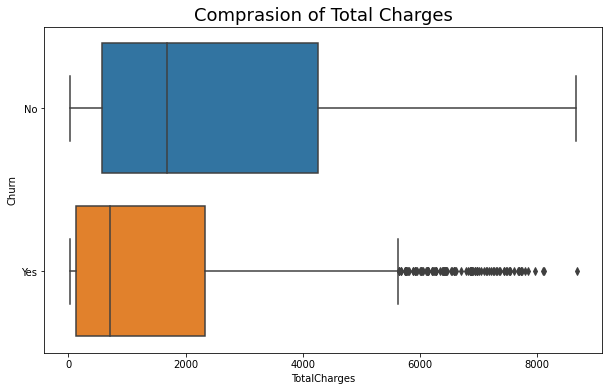

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=churn, x='TotalCharges', y='Churn')
plt.title("Comprasion of Total Charges", fontsize=18)
plt.show()

The customers who have churned seems that many customers has been charged a high amount. Outliers shows that high amounts charged from customers. The median charges is low in case of Total Charges.

**Relation of Churn to Each Variable**

<Figure size 1152x1152 with 0 Axes>

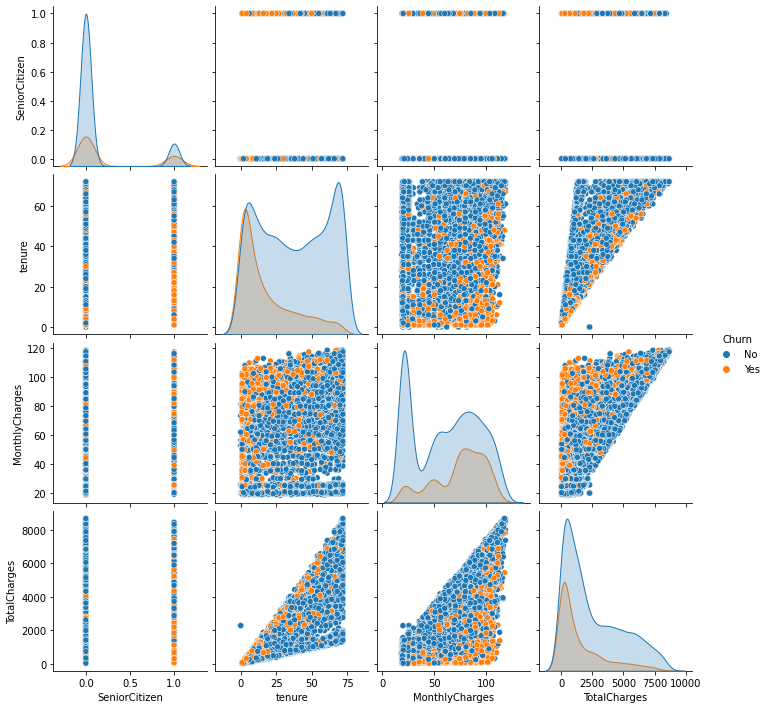

In [ ]:
plt.figure(figsize=(16,16))
sns.pairplot(churn, hue="Churn")
plt.show()

*From the above chart I got to know, there are less linear relationship between variables and data points aren't linearly separable. Churned customers data is clusetered and ovearlapped each other. Non churn data are quite symmetrical in nature and churned customer data are quite non symmetric in nature.*

**Contract Distribution**

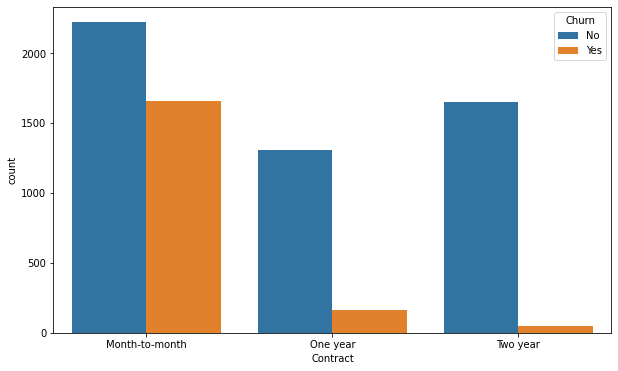

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=churn, x='Contract', hue='Churn')
plt.show()

*Most of the Churns are for the customers who have monthly contract.*

**Tenure Distribution**

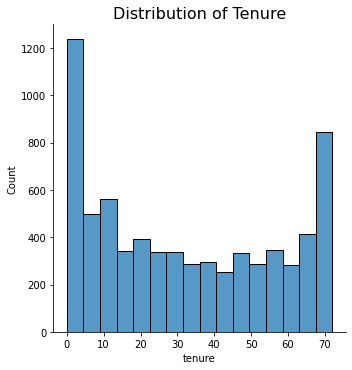

In [ ]:
sns.displot(churn.tenure)
plt.title("Distribution of Tenure", fontsize=16)
plt.show()

*Most of the Customers are for less than 10 months of contract or more than 60 months of contract.*

**Correlation Matrix**

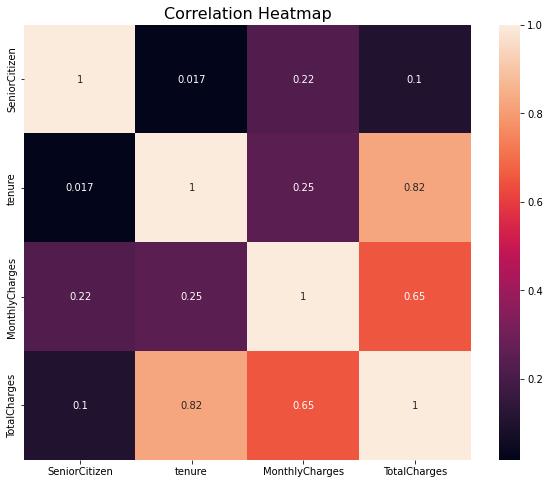

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(churn.corr(), annot=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

*We have only one high correlation between Tenure & MonthyCharges. And rest is OK. We have also very less correlation with Senior Citizen. We can drop that column.*

**Distribution of Phone Service & Internet Service**

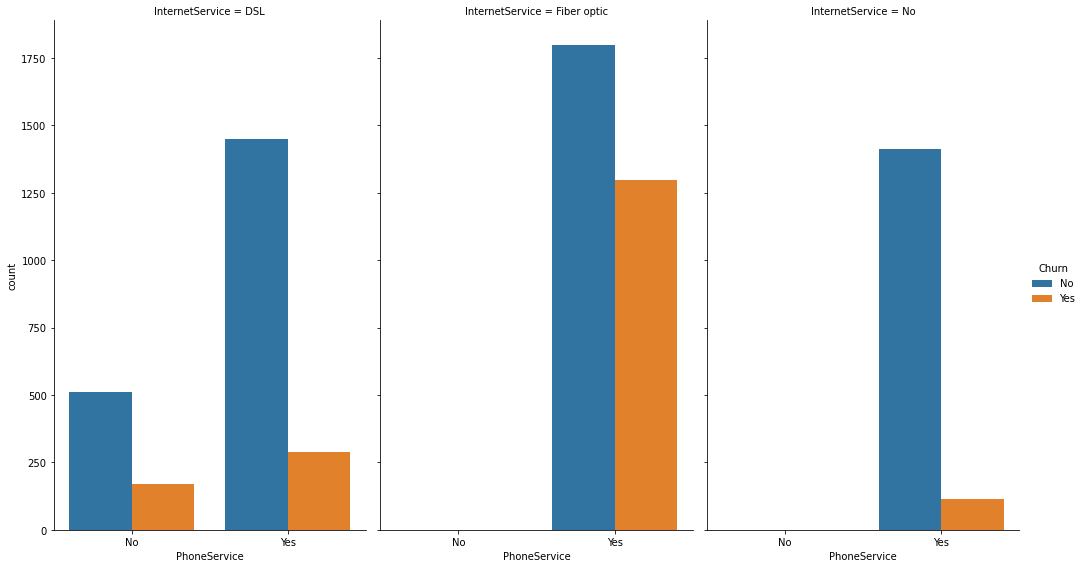

In [ ]:
sns.catplot(data=churn, x="PhoneService", col="InternetService", hue='Churn', kind="count", height=8, aspect=.6)
plt.show()

*Customers having no phone service and they are only subscribers of fiber optic is very high in Churn.*

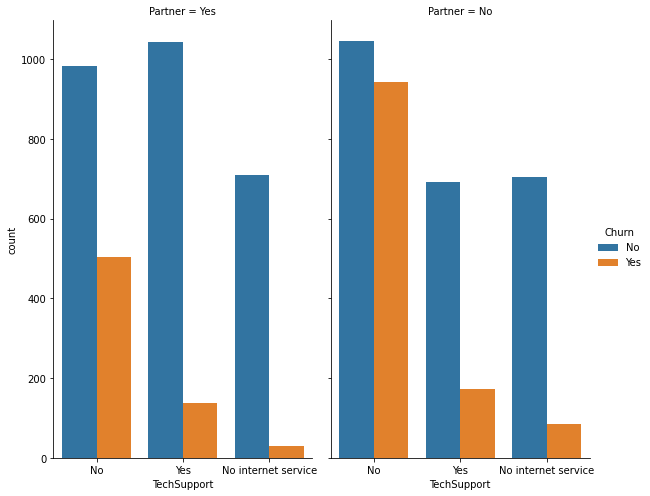

In [ ]:
sns.catplot(data=churn, x="TechSupport", col="Partner", hue='Churn', kind="count", height=7, aspect=.6)
plt.show()

*The churn rate of customers who are not getting enough tech support and not partener also are high in numbers.*

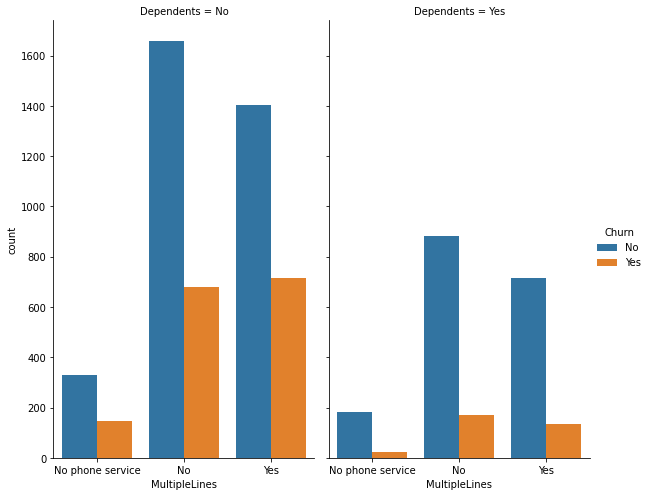

In [ ]:
sns.catplot(data=churn, x="MultipleLines", col="Dependents", hue='Churn', kind="count", height=7, aspect=.6)
plt.show()

*The churn rate of customers who have multiple lines are also high.*

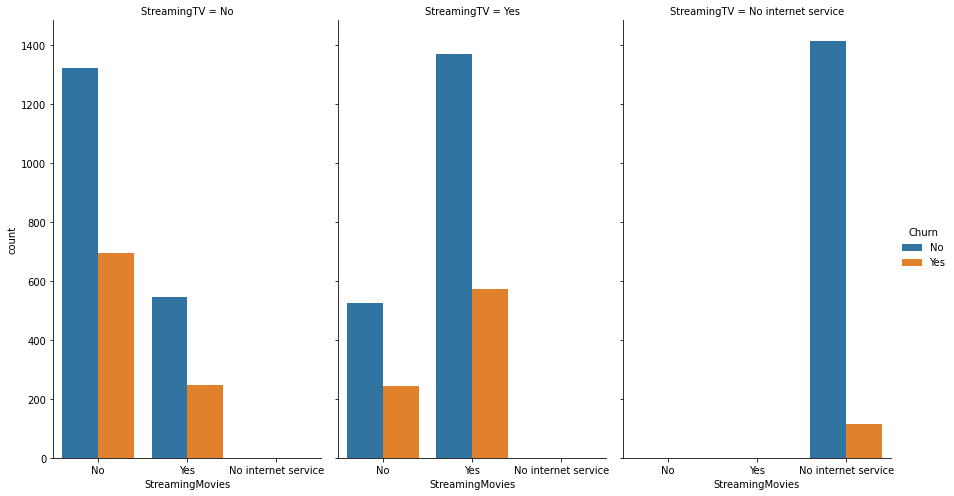

In [ ]:
sns.catplot(data=churn, x="StreamingMovies", col="StreamingTV", hue='Churn', kind="count", height=7, aspect=.6)
plt.show()

***

### ***Feature Engineering & Data Pre-processing***

**Outlier Detection**

In [ ]:
num_columns = churn.select_dtypes(['int64','float64']).columns.to_list()
num_columns.remove('SeniorCitizen')

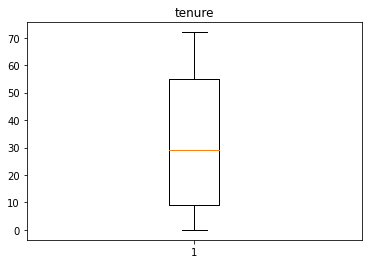

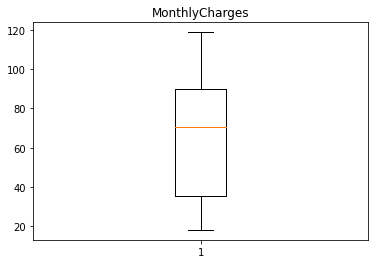

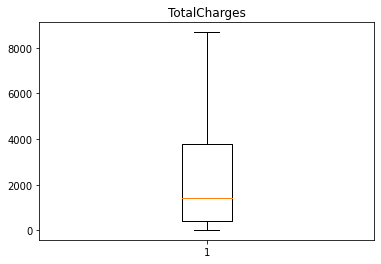

In [ ]:
for var in num_columns:
  plt.boxplot(churn[var])
  plt.title(var)
  plt.show()

*There is not any outliers preset in the dataset*

**Categorical Encoding**

In [ ]:
#Mapping the Churn column into 1 & 0
churn['Churn'] = churn['Churn'].map({'Yes': 1, 'No': 0})

*The Churn column is the Dependent Variable. So, for machine leaning algoriths we need to convert into numerical values.*

**Feature Manipulation & Selection**

In [ ]:
X = churn.drop(['customerID','gender','SeniorCitizen','OnlineBackup','DeviceProtection','Churn','OnlineSecurity'],axis=1)
y= churn['Churn']

**Data Transformation**

In [ ]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


*Converted the Categorical columns into Numerical Columns using Dummies variables and dropped the first value.*

**Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, stratify=y, random_state = 1)

print("Shape of X_train dataset: ", X_train.shape)
print("Shape of y_train dataset: ", y_train.shape)
print("Shape of X_test dataset: ", X_test.shape)
print("Shape of y_test dataset: ", y_test.shape)

Shape of X_train dataset:  (5282, 22)
Shape of y_train dataset:  (5282,)
Shape of X_test dataset:  (1761, 22)
Shape of y_test dataset:  (1761,)


*Splitted our dataset into Training and Testing sets with Training Size = 75% and Testing Size = 25%. Stratified the data dataset to that Train and Test size can get equal ratio of dependent variables.*

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

*Scaled the X_train and X_test using Standard Scaler. The Standard Scaler fits out datapoints using z-score for each variable.*

***

### ***ML Model Training & Evaluation***

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

#Instantiating
LR = LogisticRegression()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
ADA = AdaBoostClassifier()
GB = GradientBoostingClassifier()
XG = XGBClassifier()
Classifiers = [LR,DT,RF,ADA,GB,XG]

#Importing Accuracy Score
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, roc_curve

LogisticRegression()
	 Training Accuracy Score is:  0.8049981067777358
	 Testing Accuracy Score is:  0.8069278818852924
	 Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1294
           1       0.66      0.55      0.60       467

    accuracy                           0.81      1761
   macro avg       0.76      0.72      0.74      1761
weighted avg       0.80      0.81      0.80      1761

	 Confusion Matrix: 



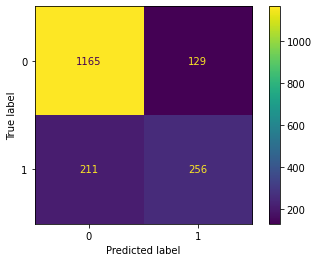




DecisionTreeClassifier()
	 Training Accuracy Score is:  0.9965921999242711
	 Testing Accuracy Score is:  0.7314026121521863
	 Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1294
           1       0.49      0.49      0.49       467

    accuracy                           0.73      1761
   macro avg       0.66      0.65      0.65      1761
weighted avg       0.73      0.73      0.73      1761

	 Confusion Matrix: 



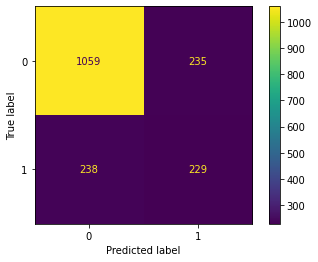




RandomForestClassifier()
	 Training Accuracy Score is:  0.9965921999242711
	 Testing Accuracy Score is:  0.7893242475865985
	 Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1294
           1       0.63      0.49      0.55       467

    accuracy                           0.79      1761
   macro avg       0.73      0.70      0.71      1761
weighted avg       0.78      0.79      0.78      1761

	 Confusion Matrix: 



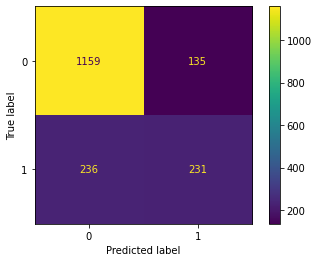




AdaBoostClassifier()
	 Training Accuracy Score is:  0.8040514956455888
	 Testing Accuracy Score is:  0.7995457126632595
	 Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1294
           1       0.66      0.50      0.57       467

    accuracy                           0.80      1761
   macro avg       0.75      0.70      0.72      1761
weighted avg       0.79      0.80      0.79      1761

	 Confusion Matrix: 



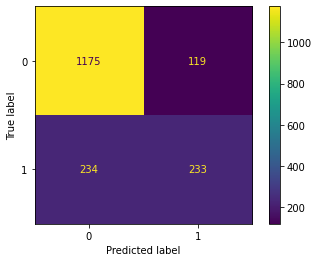




GradientBoostingClassifier()
	 Training Accuracy Score is:  0.8209011737978038
	 Testing Accuracy Score is:  0.8012492901760363
	 Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1294
           1       0.67      0.49      0.57       467

    accuracy                           0.80      1761
   macro avg       0.75      0.70      0.72      1761
weighted avg       0.79      0.80      0.79      1761

	 Confusion Matrix: 



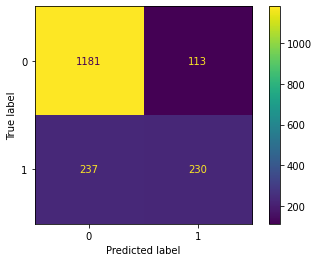




XGBClassifier()
	 Training Accuracy Score is:  0.8167360848163574
	 Testing Accuracy Score is:  0.80465644520159
	 Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1294
           1       0.68      0.49      0.57       467

    accuracy                           0.80      1761
   macro avg       0.76      0.70      0.72      1761
weighted avg       0.79      0.80      0.79      1761

	 Confusion Matrix: 



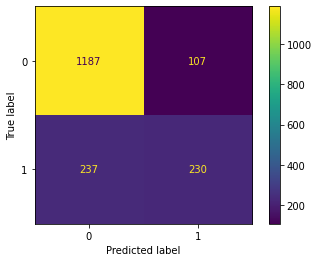

In [ ]:
for model in Classifiers:
  model.fit(X_train_sc, y_train)
  predictions = model.predict(X_test_sc)
  pred = model.predict(X_train_sc)
  print(model)
  print("\t Training Accuracy Score is: ", accuracy_score(y_train, pred))
  print("\t Testing Accuracy Score is: ", accuracy_score(y_test, predictions))
  print("\t Classification Report: \n", classification_report(y_test, predictions))
  print("\t Confusion Matrix: \n")
  ConfusionMatrixDisplay.from_predictions(y_test, predictions)
  plt.show()
  print("\n\n")

*XGBClassifier has best trainig and testing result. Now, using Hprerparameter Tuning and Cross Validation try to find the best parameter and increase the accuracy score of the model.*


*   Training Accuracy Score is:  0.82
*	  Testing Accuracy Score is:  0.81 

*There is an overfitting issue with Decision Tree and Random Forest Classifier so not going further with that model.*

**Cross-Validation & Hyperparameter Tuning of XGBClassifier**

In [ ]:
from sklearn.model_selection import GridSearchCV
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Fit the Algorithm
# Grid search
xg_grid = GridSearchCV(estimator= XG,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

xg_grid.fit(X_train_sc,y_train)
# Predict on the model
# Making predictions on train and test data

preds = xg_grid.predict(X_test_sc)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.4s
[CV] END max_depth=4, min_sam

In [ ]:
print("Best: %f using %s" % (xg_grid.best_score_, xg_grid.best_params_))

Best: 0.846680 using {'max_depth': 4, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 50}


There is an improvement in accuracy score after hyper tuning. The best accuracy has increased upto **4%** with Best parameters **"{'max_depth': 4, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 50}"**

***

### **Conclusion**

**Here are some solution to Reduce Customer Churn**

* Improve Tech Support.
* Be proactive with communication.
* Provide better streaming speed or give offers on streaming services.
* Periodically throw Offers to retain customers.
* Modify Monthly plans.
* Improve fiber services.
* Modify payment methods. Maybe customers facing issues with electronic-check
* Increase Dependents and Partners.
* Analyze churn when it happens.
* Stay competitive.

The best model to deploy is: **XGBClassifier with hypertuning.**

Submitted By: ***Sanu Satyam***